# TensorFlow 
## Convolutional Neural Network for Classification of MNIST Handwritten Digit Dataset
by [Sameer Kumar](https://sites.google.com/view/bvsk35/home?authuser=0)

### Introduction
Here I have created a basic code to show the how to use TensorFlow and buidl CNN for classification of MNIST Handwritten digit dataset. We can achieve accuracy of 97% using fully connected nerual network. But using simple CNN we can achieve accuracy over 99%.

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train.

### CNNs
These are inspired from the Wiesel and Hubel research on analysis of visual cortex, development of the visual system and description of ocular dominance columns for which they have won Nobel Prize.

Below image is representation of convolutional neural networks in LeNet style (The LeNet architecture was first introduced by LeCun et al. in their 1998 paper, Gradient-Based Learning Applied to Document Recognition). If input image is Black & weight i.e. binary then it has only single channel i.e. only set of pixel values will be present. If input image is a Color image then we have three channels i.e. one set of pixels for primary colors RGB. If we apply `n` different set of filters on any kind of image (B&W or Color) then we end up with `n` different outputs i.e. each filter gives one output. Each of the `n` filters can have `m` subset of filters based on no. of channels for example if image is B&W then we have `1` channel hence `m = 1`, if color then we have `3` channels hence `m = 3`. Also, after applying first convolution layer on given image (B&W or Color) we can have output with `p` no. of channels, then in that case `m` for next layer will be equal to `p`.

In below picture we can see that we start with 3 channel image and 128 x 128 pixels. Then we apply filter of some size (it can be anything) since we have 3 channels in the image each filter we apply will have 3 channels and we have 16 of those. Size of the output remains same because we can pad the input to maintain size of input and ouput to be same. In each convolutional layer some kind of activation function is applied. Calculation of the output of convolutional is simple, it is nothing but dot product of the filter applied on the image. After this people do max-pooling (sometimes location of the feature is not important) to decrease the resolution of the image. This is done by taking max value of the pixel in that image. We can other variants like L2 pooling etc. There is no activation function after pooling operation. This process is repeated until we extracted the important information/features from the images. Finally we have a fully-connected layer for doing the classification. This process reduces no. of trainable parameters required drastically [link](http://cs231n.github.io/convolutional-networks/). 
![alt text](images\4.png "Fig.1")

### Convolutional Layer
The following chart shows the basic idea of processing an image in the first convolutional layer. The input image depicts the number 7 and four copies of the image are shown here, so we can see more clearly how the filter is being moved to different positions of the image. For each position of the filter, the dot-product is being calculated between the filter and the image pixels under the filter, which results in a single pixel in the output image. So moving the filter across the entire input image results in a new image being generated.

The red filter-weights means that the filter has a positive reaction to black pixels in the input image, while blue pixels means the filter has a negative reaction to black pixels.

In this case it appears that the filter recognizes the horizontal line of the 7-digit, as can be seen from its stronger reaction to that line in the output image.

![alt text](images\1.png "Fig.2")

The step-size for moving the filter across the input is called the stride. There is a stride for moving the filter horizontally (x-axis) and another stride for moving vertically (y-axis).

In the code below, the stride is set to 1 in both directions, which means the filter starts in the upper left corner of the input image and is being moved 1 pixel to the right in each step. When the filter reaches the end of the image to the right, then the filter is moved back to the left side and 1 pixel down the image. This continues until the filter has reached the lower right corner of the input image and the entire output image has been generated.

When the filter reaches the end of the right-side as well as the bottom of the input image, then it can be padded with zeroes (white pixels). This causes the output image to be of the exact same dimension as the input image.

Furthermore, the output of the convolution may be passed through a so-called Rectified Linear Unit (ReLU), which merely ensures that the output is positive because negative values are set to zero. The output may also be down-sampled by so-called max-pooling, which considers small windows of 2x2 pixels and only keeps the largest of those pixels. This halves the resolution of the input image e.g. from 28x28 to 14x14 pixels.

Note that the second convolutional layer is more complicated because it takes 16 input channels. We want a separate filter for each input channel, so we need 16 filters instead of just one. Furthermore, we want 36 output channels from the second convolutional layer, so in total we need 16 x 36 = 576 filters for the second convolutional layer. It can be a bit challenging to understand how this works.

### Flowchart
The following chart shows roughly how the data flows in the Convolutional Neural Network that is implemented below. ![alt text](images\2.png "Fig.3")

Flowcharts depicts what has been descibed above. The input image is processed in the first convolutional layer using the filter-weights. This results in 16 new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased from 28x28 to 14x14.

These 16 smaller images are then processed in the second convolutional layer. We need filter-weights for each of these 16 channels, and we need filter-weights for each output channel of this layer. There are 36 output channels so there are a total of 16 x 36 = 576 filters in the second convolutional layer. The resulting images are down-sampled again to 7x7 pixels.

The output of the second convolutional layer is 36 images of 7x7 pixels each. These are then flattened to a single vector of length 7 x 7 x 36 = 1764, which is used as the input to a fully-connected layer with 128 neurons (or elements). This feeds into another fully-connected layer with 10 neurons, one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

Note that the computation in TensorFlow is actually done on a batch of images instead of a single image, which makes the computation more efficient. This means the flowchart actually has one more data-dimension when implemented in TensorFlow.

### Practical implementation
In theory CNN architecture says `Convolutional Layer - Non-linear Activation - Pooling Layer` but in practice we do `Convolutional Layer - Pooling Layer - Non-linear Activation`. There is nice reasoning for this in the following [link](https://stackoverflow.com/questions/35543428/activation-function-after-pooling-layer-or-convolutional-layer). It says that if we have non-decreasing non-linear activation functions then order doesn't matter becasue they satisfy commutative property. This can be verified by doing experiments and observing that we end up with same amount performance. Also, applying activation function helps to decrease the computation time (it may not matter sometimes because max time spent while doing convolution). 

**Supress warnings**: When calling *tensorflow* module in Juptyer Notebook it raises warning of *h5py* compliation against wrong version of *hdf5* in Windows OS when using Anaconda. Even though internally all versions are correct this might be due to wrong version written recipe file. 

**TLDR;** Warnings can be ignored (since everything works properly) and to suppress the warning I am calling this function. But it is not necessary. If you want to see warnings once (which happens by default in Juptyer notebook) uncomment the third line below and comment the second line. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

### Imports
Import all the required modules and *Load_MNIST_Data* has a class *MNIST* written by me which has all basic helper functions required. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from Load_MNIST_Data import MNIST

import math

### Load Data
Load the MNIST data using *prep_data* which outputs training set, validation set and test set scaled based on the scaling defined by the user. Default is 'MMS': MinMaxScaler and other option is 'SS': StandardScaler. Use *one_hot_encoded* to generate the one hot encoded vectors for training purposes. 

In [3]:
data = MNIST(scaling='MMS')
train_img, train_label, val_img, val_label, test_img, test_label = data.prep_data('train-images-idx3-ubyte.gz', 
                                                                                  'train-labels-idx1-ubyte.gz', 
                                                                                  't10k-images-idx3-ubyte.gz', 
                                                                                  't10k-labels-idx1-ubyte.gz')
hot_label_train, hot_label_val, hot_label_test = data.one_hot_encoded(train_label, val_label, test_label)

The MNIST data-set has now been loaded and consists of 70000 images and labels for the images. The dataset is split into 3 mutually exclusive subsets.

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


### Configuration of Neural Network
The configuration of the Convolutional Neural Network is defined here for convenience. Copy some of the data-dimensions for convenience.

In [5]:
# Convolutional Layer 1.
filter_size_1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters_1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size_2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters_2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.


# The number of pixels in each dimension of an image.
img_size = data.img_size

# The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat

# Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape

# Number of classes, one class for each of 10 digits.
num_classes = data.num_classes

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = data.num_channels

### One-Hot Encoding
The output data is loaded as both integer labels and One-Hot encoded arrays. This means the labels have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i^{th}$ element which is 1 and means the class is $i$. For example, the One-Hot encoded labels for the first 5 images in the test-set are:

In [6]:
print('One-Hot Encoded vectors: \n', hot_label_test[:5, :])

One-Hot Encoded vectors: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


We also need the classes as integers for various comparisons and performance measures. These can be found from the One-Hot encoded arrays by taking the index of the highest element using the `np.argmax()` function. But this has already been done when the dataset was loaded, so we can see the labels for the first five images in the test set. Compare these to the One-Hot encoded arrays above.

In [7]:
print('Labels: \n', test_label[:5])

Labels: 
 [7 2 1 0 4]


### Helper function for Plotting
This function is used to plot images in a nxn grid. 

In [8]:
def plot_images(images, cls_true, cls_pred=None, color_map='binary'):
    check = int(np.sqrt(images.shape[0]))
    try:
        assert check * check == images.shape[0] 
    except AssertionError:
        raise AssertionError("Input array first dimension must be square")
    
    if check != 1:
        # Create figure with nxn sub-plots.
        fig, axes = plt.subplots(check, check)
        fig.subplots_adjust(hspace=0.3, wspace=0.3)

        for i, ax in enumerate(axes.flat):
            # Plot image.
            ax.imshow(images[i].reshape(img_shape), cmap=color_map)

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true[i])
            else:
                xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

            ax.set_xlabel(xlabel)

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
    else:
        fig, axes = plt.subplots()
        axes.imshow(images.reshape(img_shape), cmap=color_map)
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true)
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true, cls_pred)

        axes.set_xlabel(xlabel)

        # Remove ticks from the plot.
        axes.set_xticks([])
        axes.set_yticks([])       
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Plot a few images to see how does dataset looks
This images depends on which kind of scaling you are using. If you use 'SS' scaling then images look as if it has been smudged and if you use 'MMS' scaling then images look as if more crisp **People mostly use 'MMS' scaling** .

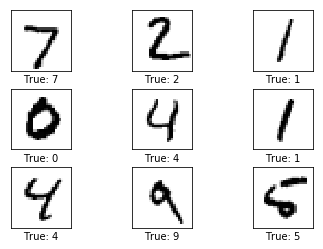

In [9]:
# Get the first images from the test-set.
images = test_img[0:9]

# Get the true classes for those images.
cls_true = test_label[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## TensorFlow Graph
The entire purpose of TensorFlow is to have a computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also efficiently load tons of real world data present in storage drives (in the format of byte) and perform computations faster than NumPy. 

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple arithmetic expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) that are even faster than GPUs.

A TensorFlow graph consists of the following parts (and many more):
* Placeholder: variables used to feed input into the graph.
* Model variables: that are going to be optimized so as to make the model perform better.
* Model: which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* Cost: measure that can be used to guide the optimization of the variables.
* Optimization method: which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard.

### Helper-functions for creating new variables
Functions for creating new TensorFlow variables in the given shape and initializing them with random values. Note that the initialization is not actually done at this point, it is merely being defined in the TensorFlow graph.

`tf.truncated_normal()`: Outputs random values from a truncated normal distribution. The generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked.

In [10]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [11]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

### Helper-function for creating a new Convolutional Layer
This function creates a new convolutional layer in the computational graph for TensorFlow. Nothing is actually calculated here, we are just adding the mathematical formulas to the TensorFlow graph.

It is assumed that the argument `input_img` passed to the function is a 4-dim tensor with the following dimensions:
- Total no. of images.
- Y-axis of each image.
- X-axis of each image.
- Channels of each image.

Note that the input channels may either be **colour-channels**, or it may be **filter-channels** if the input is produced from a previous convolutional layer.

The `output image` of the convolution layer will be another 4-dim tensor with the following dimensions:
- Total no. of images, same as input.
- Y-axis of each image. If 2x2 pooling is used, then the height and width of the input images is divided by 2.
- X-axis of each image. If 2x2 pooling is used, then the height and width of the input images is divided by 2.
- Channels produced by the convolutional filters.

`tf.nn.conv2d`: Computes a 2-D convolution given 4-D `input` and `filter` tensors. Please refer to this [link](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) for detailed explanation for each args that this function takes. It is very important. 

`tf.nn.max_pool`: Performs the max pooling on the input. Please refer to this [link](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool) and this [link](https://stackoverflow.com/questions/38601452/the-usages-of-ksize-in-tf-nn-max-pool) for detailed explanation for each args that this function takes.

**Note:** All our images and filters are square matrices.

In [12]:
def new_conv_layer(input_img,              # input images from previous layer.
                   num_input_channels,     # no. of channels in prev. layer.
                   filter_size,            # width and height of each filter.
                   num_filters,            # no. of filters.
                   use_pooling=True):      # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # For ex: strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input_img,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added after applying one of the `n` filters (which contains `p`-channel filters).
    layer += biases

    # Use pooling to down-sample the image resolution.
    if use_pooling:
        # ksize: talks about size of the pooling kernel.
        # stride: talks about no. of steps taking by kernel.
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

### Helper-function for flattening a layer
A convolutional layer produces an output tensor with 4 dimensions. We will add fully-connected layers after the convolution layers, so we need to reduce the 4-dim tensor to 2-dim which can be used as input to the fully-connected layer.

In [13]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    # num_elements(): Returns the total number of elements, or none for incomplete shapes.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

### Helper-function for creating a new Fully-Connected Layer or Dense Layer
This function creates a new fully-connected layer in the computational graph for TensorFlow. It is assumed that the input is a 2-dim tensor of shape `[num_images, num_inputs]`. The output is a 2-dim tensor of shape `[num_images, num_outputs]`.

In [35]:
def new_fc_layer(input_img,          # The previous layer.
                 num_inputs,         # Num. inputs from prev. layer.
                 num_outputs,        # Num. outputs.
                 use_ReLU=True):     # Use ReLU in layers before final layer  

    # Create new weights (using Xavier initialisation) and biases.
    weights = tf.Variable(tf.contrib.layers.xavier_initializer()([num_inputs, num_outputs]))
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input_img, weights) + biases

    # Use ReLU activation function
    if use_ReLU:
        layer = tf.nn.relu(layer)

    return layer

### Placeholder variables
Placeholder variables serve as the input to the graph that we may change each time we execute the graph. This is known as feeding the placeholder variables.

First we define the placeholder variable for the *input* *images*. This allows us to change the images that are input to the TensorFlow graph. This is a tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to `float64` and the shape is set to `[None, img_size_flat]`, where None means that the tensor may hold an arbitrary number of images with each image being a vector of length `img_size_flat`.

In [15]:
X = tf.placeholder(name='Input', dtype=tf.float32, shape=[None, img_size_flat])

The convolutional layers expect x to be encoded as a 4-dim tensor so we have to reshape it so its shape is instead `[num_images, img_height, img_width, num_channels]`. Note that `img_height == img_width == img_size` and `num_images` can be inferred automatically by using `-1` for the size of the first dimension. So the reshape operation is:

In [16]:
X_image = tf.reshape(X, [-1, img_size, img_size, num_channels])

Finally, we have the placeholder variable for the **desired/predicted** one-hot encoded labels associated with the images that were input in the placeholder variable `X`. The shape of this placeholder variable is `[None, num_classes]` which means it may hold an arbitrary number of them and each one-hot encoded labels is a vector of length num_classes which is 10 in this case.

In [17]:
y_true_hot = tf.placeholder(name='Outputs', dtype=tf.float32, shape=[None, num_classes])

Next we have the placeholder variable for the **desired/predicted** *labels* of each image in the placeholder variable `X`. These are integers and the dimensionality of this placeholder variable is set to `[None]` which means the placeholder variable is a one-dimensional vector of arbitrary length.

In [18]:
y_true = tf.argmax(y_true_hot, axis=1)

### Convolutional Layer 1
Create the first convolutional layer. It takes `X_image` as input and creates num_filters1 different filters, each having width and height equal to `filter_size1`. Finally we wish to down-sample the image so it is half the size by using 2x2 max-pooling.

In [19]:
layer_conv_1, weights_conv_1 = \
    new_conv_layer(input_img=X_image, 
                   num_input_channels=num_channels, 
                   filter_size=filter_size_1, 
                   num_filters=num_filters_1, 
                   use_pooling=True)

Check the shape of the tensor that will be output by the convolutional layer. It should be `(?, 14, 14, 16)` which means that there is an arbitrary number of images (indicated by `?`), each image is `14` pixels wide and `14` pixels high, and there are `16` different channels, `1` channel for each of the `5 x 5 x 1` filters and we have `16` of them.

In [20]:
layer_conv_1

<tf.Tensor 'Relu:0' shape=(?, 14, 14, 16) dtype=float32>

### Convolutional Layer 2
Create the second convolutional layer, which takes as input the output from the first convolutional layer. The number of input channels corresponds to the number of filters in the first convolutional layer.

In [23]:
layer_conv_2, weights_conv_2 = \
    new_conv_layer(input_img=layer_conv_1,
                  num_input_channels=num_filters_1,
                  filter_size=filter_size_2,
                  num_filters=num_filters_2,
                  use_pooling=True)

Check the shape of the tensor that will be output from this convolutional layer. The shape is `(?, 7, 7, 36)` where `?` means that there is an arbitrary number of images, with each image having width and height of `7` pixels, and there are `36` different channels, `1` channel for each `5 x 5 x 16` filter and we have `36` of them.

In [24]:
layer_conv_2

<tf.Tensor 'Relu_2:0' shape=(?, 7, 7, 36) dtype=float32>

### Flatten Layer
The convolutional layers output 4-dim tensors. We now wish to use these as input in a fully-connected network, which requires for the tensors to be reshaped or flattened to 2-dim tensors.

In [27]:
layer_flat, num_features = flatten_layer(layer_conv_2)

Check that the tensors now have shape `(?, 1764)` which means there's an arbitrary number of images which have been flattened to vectors of length `1764` each. Note that `1764 = 7 x 7 x 36`.

In [28]:
layer_flat

<tf.Tensor 'Reshape_1:0' shape=(?, 1764) dtype=float32>

In [29]:
num_features

1764

### Fully-Connected Layer 1
Add a fully-connected layer to the network. The input is the flattened layer from the previous convolution. The number of neurons or nodes in the fully-connected layer is `fc_size`. `ReLU` is used the activation function.

In [36]:
layer_fc_1 = new_fc_layer(input_img=layer_flat, num_inputs=num_features, num_outputs=fc_size)

Check that the output of the fully-connected layer is a tensor with shape `(?, 128)` where there are an arbitrary number of images and `fc_size == 128`.

In [37]:
layer_fc_1

<tf.Tensor 'Relu_3:0' shape=(?, 128) dtype=float32>

### Fully-Connected Layer 2
Add another fully-connected layer that outputs vectors of length `10` for determining which of the `10` classes the input image belongs to. We will use `SoftMax` as acitvation activation. 

In [38]:
layer_fc_2 = new_fc_layer(input_img=layer_fc_1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_ReLU=False)

In [39]:
# Check the output shape
layer_fc_2

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

### Predicted Class
The second fully-connected layer estimates how likely it is that the input image belongs to each of the 10 classes. However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each element is limited between zero and one and the 10 elements sum to one. This is calculated using the so-called softmax function and the result is stored in `y_pred`.

In [41]:
y_pred_raw_prob = tf.nn.softmax(layer_fc_2)

The class-number is the index of the largest element.

In [43]:
y_pred = tf.argmax(y_pred_raw_prob, axis=1)

### Cost-function to be optimized
To make the model better at classifying the input images, we must somehow change the variables for `weights` and `biases`. To do this we first need to know how well the model currently performs by comparing the predicted output of the model `y_pred` to the desired output `y_true`.

The **cross-entropy** is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the weights and biases of the model.

TensorFlow has a built-in function for calculating the cross-entropy. Note that it uses the values of the **logits** i.e., locally induced fields because it also calculates the softmax internally. TensorFlow class *locally induced fields* as *logits*. For more refer [TensorFlow-cross-entropy](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2).

In [44]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_fc_2, labels=y_true_hot)

We have now calculated the cross-entropy for each of the image classifications so we have a measure of how well the model performs on each image individually. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [45]:
cost = tf.reduce_mean(cross_entropy)

### Optimization method
Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the `AdamOptimizer` which is an advanced form of `Gradient Descent`.

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

### Performance measures
We need a few more performance measures to display the progress. Below: this is a vector of booleans whether the predicted class equals the true class of each image.

In [47]:
correct_prediction = tf.equal(y_pred, y_true)

This calculates the classification accuracy by first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1, and then calculating the average of these numbers.

In [48]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## TensorFlow Run

### Create TensorFlow session
Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

In [49]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    return tf.Session()

In [50]:
sess = tf_reset()

### Initialize variables
The variables for `weights` and `biases` must be initialized before we start optimizing them.

In [51]:
# Initialize the variables
sess.run(tf.global_variables_initializer())

### Helper-function to perform optimization iterations
There are 55000 images in the training-set. It takes a long time to calculate the gradient of the model using all these images. We therefore use *Batch Stochastic Gradient Descent with Adam Optimizer* which only uses a small batch of images in each iteration of the optimizer.

In [52]:
batch_size = 64

Function for performing a number of optimization iterations so as to gradually improve the `weights` and `biases` of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [72]:
# Run training
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(iterations, verbose_freq=100):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    
    for i in range(total_iterations, total_iterations+iterations):
        # get a random subset/batch of the training data
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        X_batch, y_true_batch, y_true_hot_batch = data.random_batch(train_img, train_label, hot_label_train, 
                                                                        batch_size=batch_size)

        # run the optimizer and get the mse
        _, cost_run = sess.run([optimizer, cost], feed_dict={X: X_batch, y_true_hot: y_true_hot_batch})

        # print the mse every so often
        if i % verbose_freq == 0:
            acc = sess.run(accuracy, feed_dict={X: X_batch, y_true_hot: y_true_hot_batch})
            print('Epoch: {0:d} Training Accuracy: {1:0.3f} Training Cost: {2:0.3f}'.format(i, acc, cost_run))

### Helper-functions to show performance
Function for printing the classification accuracy on the test-set.

In [54]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = sess.run(accuracy, feed_dict={X: test_img, y_true: test_label, y_true_hot: hot_label_test})
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

### Helper-function to plot confusion matrix
Function for printing and plotting the confusion matrix using scikit-learn.

In [64]:
def plot_confusion_matrix(cls_pred, color_map='viridis'):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = test_label
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm, cmap=color_map)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Helper-function to plot example errors
Function for plotting examples of images from the test-set that have been mis-classified.

In [65]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = test_img[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = test_label[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])

### Helper-function for showing the performance
Function for printing the classification accuracy on the test-set.

It takes a while to compute the classification for all the images in the test-set, that's why the results are re-used by calling the above functions directly from this function, so the classifications don't have to be recalculated by each function.

In [66]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = data.num_test

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = test_img[i:j, :]

        # Get the associated labels.
        labels = hot_label_test[i:j, :]

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = sess.run(y_pred, feed_dict={X: images, y_true_hot: labels})

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = test_label

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

### Performance before any optimization
The accuracy on the test-set will be vary low around 10%. This is because the model has only been initialized and not optimized at all, so it always predicts that the image shows a zero digit.

In [67]:
print_test_accuracy()

Accuracy on Test-Set: 6.6% (657 / 10000)


### Performance after 10 optimization iteration

In [73]:
optimize(iterations=10)

Epoch: 0 Training Accuracy: 0.125 Training Cost: 2.272


In [74]:
print_test_accuracy()

Accuracy on Test-Set: 10.1% (1011 / 10000)


### Performance after 100 optimization iterations

In [ ]:
optimize(iterations=90) # We already performed 10 iterations

Epoch: 0 Training Accuracy: 0.141 Training Cost: 2.245


In [ ]:
print_test_accuracy(show_example_errors=True)

### Performance after 1000 optimization iterations

In [ ]:
optimize(iterations=900)

In [ ]:
print_test_accuracy(show_example_errors=True)

### Performance after 10000 optimization iterations

In [ ]:
optimize(iterations=9000, verbose_freq=1000)

In [ ]:
print_test_accuracy(show_example_errors=True, show_confusion_matrix=True)